In [1]:
#Multiple Linear Regression on Student Performance data set from kaggle
#Import the needed packages fro Data set analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load the dataset into the variable data
data=pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
#Perform the basic analysis 
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
#check for the null values
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
"""Their are no null values here but we have string type data here which will be difficult for a 
machine to undersand and also values in some columns varies between 100 so to over come this we need to perform STANDARDIZATION AND LABEL ENCODER"""

'Their are no null values here but we have string type data here which will be difficult for a \nmachine to undersand and also values in some columns varies between 100 so to over come this we need to perform STANDARDIZATION AND LABEL ENCODER'

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'])
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [11]:
"""The complete dataset is only with numeric data type but the vaalues in two columns are varring ina bigger range than remaining hence we go with standaardization"""

'The complete dataset is only with numeric data type but the vaalues in two columns are varring ina bigger range than remaining hence we go with standaardization'

In [14]:
#Divide the dataset as x and y values like dependent variables store them in one variable and independent in one variable 
x=data.drop('Performance Index',axis=1)
y=data['Performance Index']

In [16]:
#Split the dataset for training and testing data before standarizing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
#Now its time for performing the standarization on the trainign dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [23]:
#Now lets build our model using
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)


LinearRegression()

In [30]:
#prediction the output using our test values from teh dataset
y_pred=ml.predict(x_test)
y_pred

array([55.07482706, 22.8504016 , 48.314699  , ..., 17.04858015,
       63.63952421, 46.29885906])

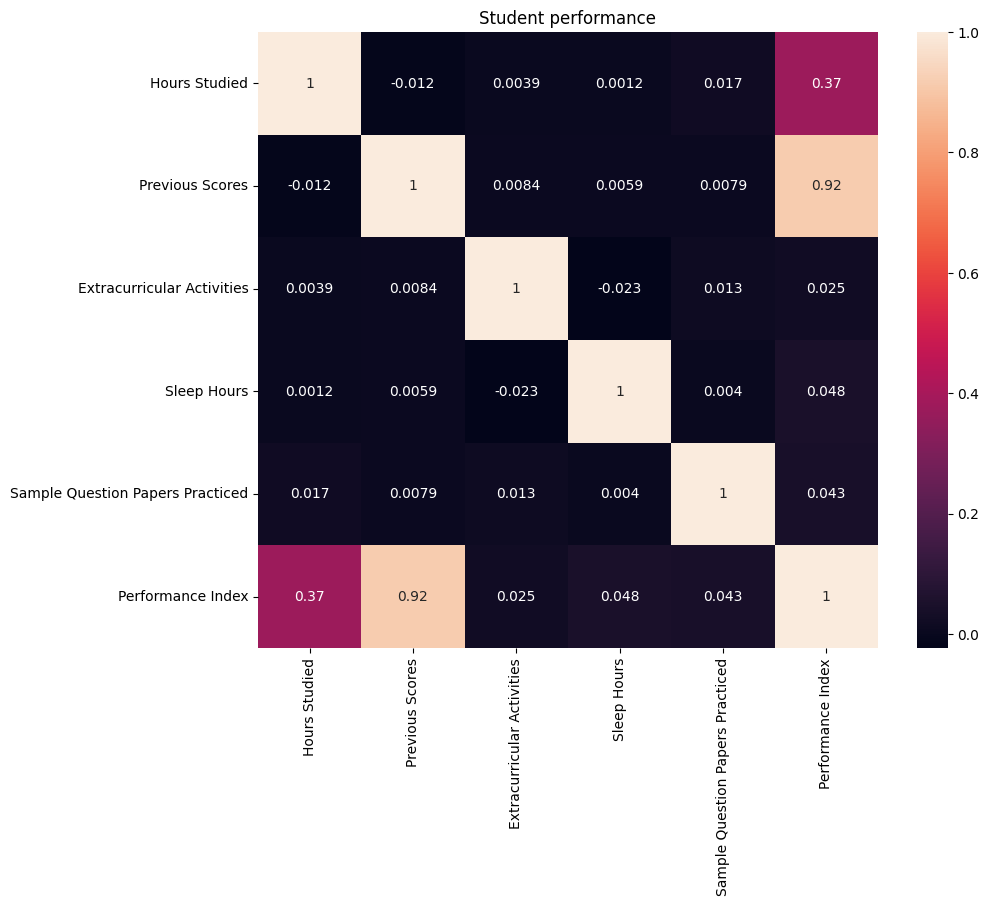

In [31]:
#Plotting the heatmap to find correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

plt.title("Student performance")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = ml.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 4.267922744275171
Mean Absolute Error (MAE): 1.6512846285053147
R² Score: 0.9884832861331776
